## 1. Logistic regression

In [381]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [382]:
data = np.loadtxt("datasets/ex2data1.txt", delimiter=",")

In [383]:
data.shape

(100, 3)

In [562]:
X = data[:, 0:2]
y = data[:, 2:]

In [480]:
X.shape

(118, 2)

In [481]:
X

array([[ 0.051267 ,  0.69956  ],
       [-0.092742 ,  0.68494  ],
       [-0.21371  ,  0.69225  ],
       [-0.375    ,  0.50219  ],
       [-0.51325  ,  0.46564  ],
       [-0.52477  ,  0.2098   ],
       [-0.39804  ,  0.034357 ],
       [-0.30588  , -0.19225  ],
       [ 0.016705 , -0.40424  ],
       [ 0.13191  , -0.51389  ],
       [ 0.38537  , -0.56506  ],
       [ 0.52938  , -0.5212   ],
       [ 0.63882  , -0.24342  ],
       [ 0.73675  , -0.18494  ],
       [ 0.54666  ,  0.48757  ],
       [ 0.322    ,  0.5826   ],
       [ 0.16647  ,  0.53874  ],
       [-0.046659 ,  0.81652  ],
       [-0.17339  ,  0.69956  ],
       [-0.47869  ,  0.63377  ],
       [-0.60541  ,  0.59722  ],
       [-0.62846  ,  0.33406  ],
       [-0.59389  ,  0.005117 ],
       [-0.42108  , -0.27266  ],
       [-0.11578  , -0.39693  ],
       [ 0.20104  , -0.60161  ],
       [ 0.46601  , -0.53582  ],
       [ 0.67339  , -0.53582  ],
       [-0.13882  ,  0.54605  ],
       [-0.29435  ,  0.77997  ],
       [-0

In [482]:
y.shape

(118, 1)

In [483]:
y

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
      

In [484]:
m, n = X.shape

In [485]:
m

118

In [486]:
n

2

## 1.1 Plotting

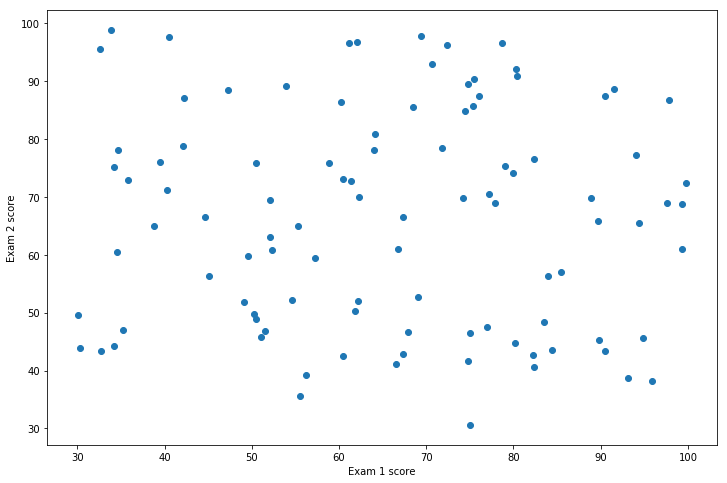

In [392]:
fig, axes = plt.subplots(figsize=(12, 8))
axes.scatter(X[:, 0], X[:, 1])
axes.set_xlabel("Exam 1 score")
axes.set_ylabel("Exam 2 score")

In [393]:
# TODO: Plot classes on the graph.

## 1.2 Compute Cost and Gradient

In [394]:
def sigmoid(z):
    return 1 / (1 + np.e ** -z)

In [395]:
sigmoid(0)

0.5

In [396]:
sigmoid(1)

0.7310585786300049

In [397]:
sigmoid(-1)

0.2689414213699951

In [398]:
initial_theta = np.zeros((n + 1, 1))
initial_theta

array([[ 0.],
       [ 0.],
       [ 0.]])

In [399]:
X = np.c_[np.ones((m, 1)), X]

In [400]:
X

array([[  1.        ,  34.62365962,  78.02469282],
       [  1.        ,  30.28671077,  43.89499752],
       [  1.        ,  35.84740877,  72.90219803],
       [  1.        ,  60.18259939,  86.3085521 ],
       [  1.        ,  79.03273605,  75.34437644],
       [  1.        ,  45.08327748,  56.31637178],
       [  1.        ,  61.10666454,  96.51142588],
       [  1.        ,  75.02474557,  46.55401354],
       [  1.        ,  76.0987867 ,  87.42056972],
       [  1.        ,  84.43281996,  43.53339331],
       [  1.        ,  95.86155507,  38.22527806],
       [  1.        ,  75.01365839,  30.60326323],
       [  1.        ,  82.30705337,  76.4819633 ],
       [  1.        ,  69.36458876,  97.71869196],
       [  1.        ,  39.53833914,  76.03681085],
       [  1.        ,  53.97105215,  89.20735014],
       [  1.        ,  69.07014406,  52.74046973],
       [  1.        ,  67.94685548,  46.67857411],
       [  1.        ,  70.66150955,  92.92713789],
       [  1.        ,  76.97878

In [401]:
def cost_function(theta, X, y):
    h = sigmoid(X @ theta)
    cost = (1 / m) * (y.T @ -np.log(h) + (1 - y).T @ -np.log(1 - h))
    return cost
    

In [402]:
cost = cost_function(initial_theta, X, y)
cost

array([[ 0.69314718]])

In [403]:
assert np.round(cost[0][0], 3) == 0.693, "Error"

In [404]:
test_theta = np.array([[-24], [0.2], [0.2]])

In [405]:
cost = cost_function(test_theta, X, y)
cost

array([[ 0.21833019]])

In [406]:
assert np.round(cost[0][0], 3) == 0.218, "Error"

## 1.3 Optimizing

In [407]:
iterations = 1500000
alpha = 0.0034

In [409]:
X.shape

(100, 3)

In [410]:
def gradient_descent(X, y, theta, alpha, iterations):
    for _ in range(iterations):
        h = sigmoid(X @ theta)
        theta = theta - alpha * (1 / m) * X.T @ (h - y)
    return theta

In [411]:
theta = gradient_descent(X, y, initial_theta, alpha, iterations)

In [412]:
theta

array([[-24.04630574],
       [  0.19731444],
       [  0.19244822]])

In [164]:
# TODO: Plot decision boundary.

In [165]:
x = np.array([[1], [45], [85]])
x

array([[ 1],
       [45],
       [85]])

In [166]:
theta

array([[-24.04630574],
       [  0.19731444],
       [  0.19244822]])

In [168]:
prob = sigmoid(theta.T @ x)
prob

array([[ 0.76690959]])

In [169]:
def predict(theta, X):
    prob = sigmoid(X @ theta)
    return np.where(prob >= 0.5, 1, 0)

In [175]:
pred = predict(theta, X)

In [176]:
accuracy = np.mean(pred == y) * 100
accuracy

89.0

In [178]:
assert accuracy == 89.0, "Error"

## 2. Regularized logistic regression

In [634]:
data = np.loadtxt("datasets/ex2data2.txt", delimiter=",")

In [635]:
data.shape

(118, 3)

In [636]:
X = data[:, :2]
y = data[:, 2]
y = y.reshape((y.shape[0], 1))

In [637]:
X.shape

(118, 2)

In [638]:
X

array([[ 0.051267 ,  0.69956  ],
       [-0.092742 ,  0.68494  ],
       [-0.21371  ,  0.69225  ],
       [-0.375    ,  0.50219  ],
       [-0.51325  ,  0.46564  ],
       [-0.52477  ,  0.2098   ],
       [-0.39804  ,  0.034357 ],
       [-0.30588  , -0.19225  ],
       [ 0.016705 , -0.40424  ],
       [ 0.13191  , -0.51389  ],
       [ 0.38537  , -0.56506  ],
       [ 0.52938  , -0.5212   ],
       [ 0.63882  , -0.24342  ],
       [ 0.73675  , -0.18494  ],
       [ 0.54666  ,  0.48757  ],
       [ 0.322    ,  0.5826   ],
       [ 0.16647  ,  0.53874  ],
       [-0.046659 ,  0.81652  ],
       [-0.17339  ,  0.69956  ],
       [-0.47869  ,  0.63377  ],
       [-0.60541  ,  0.59722  ],
       [-0.62846  ,  0.33406  ],
       [-0.59389  ,  0.005117 ],
       [-0.42108  , -0.27266  ],
       [-0.11578  , -0.39693  ],
       [ 0.20104  , -0.60161  ],
       [ 0.46601  , -0.53582  ],
       [ 0.67339  , -0.53582  ],
       [-0.13882  ,  0.54605  ],
       [-0.29435  ,  0.77997  ],
       [-0

In [639]:
y.shape

(118, 1)

In [640]:
y

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
      

In [641]:
m, n = X.shape

In [642]:
m

118

In [643]:
n

2

## 2.1 Plotting

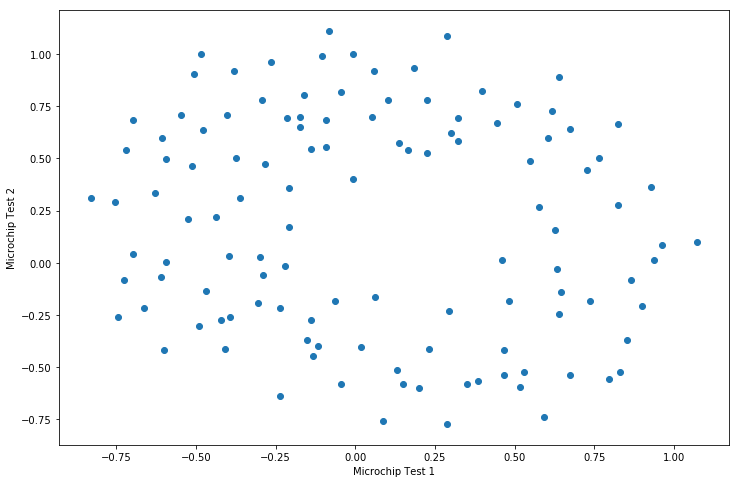

In [644]:
fig, axes = plt.subplots(figsize=(12, 8))
axes.scatter(X[:, 0], X[:, 1])
axes.set_xlabel("Microchip Test 1")
axes.set_ylabel("Microchip Test 2")

In [645]:
# TODO: Plot classes on the graph.

## 2.2 Features mapping

In [646]:
# TODO: Implement this in Python.
from sklearn.preprocessing import PolynomialFeatures

def map_features(X):
    poly_features = PolynomialFeatures(degree=6, include_bias=True)
    X_poly = poly_features.fit_transform(X)
    return X_poly

In [647]:
X = map_features(X)

In [648]:
X.shape

(118, 28)

In [649]:
X

array([[  1.00000000e+00,   5.12670000e-02,   6.99560000e-01, ...,
          6.29470940e-04,   8.58939846e-03,   1.17205992e-01],
       [  1.00000000e+00,  -9.27420000e-02,   6.84940000e-01, ...,
          1.89305413e-03,  -1.39810280e-02,   1.03255971e-01],
       [  1.00000000e+00,  -2.13710000e-01,   6.92250000e-01, ...,
          1.04882142e-02,  -3.39734512e-02,   1.10046893e-01],
       ..., 
       [  1.00000000e+00,  -4.84450000e-01,   9.99270000e-01, ...,
          2.34007252e-01,  -4.82684337e-01,   9.95627986e-01],
       [  1.00000000e+00,  -6.33640000e-03,   9.99270000e-01, ...,
          4.00328554e-05,  -6.31330588e-03,   9.95627986e-01],
       [  1.00000000e+00,   6.32650000e-01,  -3.06120000e-02, ...,
          3.51474517e-07,  -1.70067777e-08,   8.22905998e-10]])

## 2.3 Cost function

In [650]:
lambda_param = 1;
initial_theta = np.zeros((X.shape[1], 1))

In [651]:
def cost_function(theta, X, y, lamda_param):
    h = sigmoid(X @ theta)
    cost_term = (1 / m) * (y.T @ -np.log(h) + (1 - y).T @ -np.log(1 - h))
    lambda_term = (1 / (2 * m)) * lamda_param * np.sum(theta[1:] ** 2, axis=0)
    return cost_term + lambda_term  

In [652]:
cost = cost_function(initial_theta, X, y, lambda_param)
cost

array([[ 0.69314718]])

In [653]:
assert np.round(cost[0], 3) == 0.693, "Error"

In [654]:
test_theta = np.ones((X.shape[1], 1))
test_theta.shape

(28, 1)

In [655]:
cost = cost_function(test_theta, X, y, 10)

In [656]:
assert np.round(cost[0], 2) == 3.16, "Error"

## 2.3 Optimizing

In [661]:
iterations = 1500000
alpha = 0.0034
initial_theta = np.zeros((X.shape[1], 1))
lambda_param = 1

In [687]:
def gradient_descent(X, y, theta, alpha, iterations, lambda_param):
    theta_res = theta.copy()
    for _ in range(iterations):
        h = sigmoid(X @ theta_res)
        cost_term = (1 / m) * X.T @ (h - y)
        theta_regular = np.r_[np.array([[0]]), theta_res[1:]]
        lambda_term = (1 / m) * lambda_param * theta_regular
        theta_res = theta_res - alpha * (cost_term + lambda_term)
    return theta_res

In [679]:
theta = gradient_descent(X, y, initial_theta, alpha, iterations, lambda_param)

In [680]:
theta

array([[ 1.27273951],
       [ 0.6252718 ],
       [ 1.18108869],
       [-2.01996086],
       [-0.91742375],
       [-1.43166444],
       [ 0.12400635],
       [-0.36553437],
       [-0.35723962],
       [-0.17513048],
       [-1.45815646],
       [-0.05098906],
       [-0.61555504],
       [-0.27470631],
       [-1.19281652],
       [-0.24218823],
       [-0.20600609],
       [-0.04473075],
       [-0.2777845 ],
       [-0.2953781 ],
       [-0.45635749],
       [-1.04320249],
       [ 0.02777171],
       [-0.29243131],
       [ 0.01556681],
       [-0.32737959],
       [-0.14388693],
       [-0.92465257]])

In [681]:
# TODO: Plot decision boundary.

In [682]:
pred = predict(theta, X)

In [685]:
accuracy = np.mean(pred == y) * 100
accuracy

83.050847457627114

In [686]:
assert np.round(accuracy, 1) == 83.1, "Error"

In [688]:
# TODO: Tune and plot different regularization params and see decision boundary.